In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
test=pd.read_csv('/nobackup/khauskne/kdd/shap.csv')

In [41]:
test=test.iloc[np.where(test['dataset']=='test')]

In [42]:
robo_flags=pd.read_csv('/nobackup/khauskne/kdd/robovetter_flags_all_DR25.csv')

In [43]:
robo_flags

,Unnamed: 0,target_id,tce_plnt_num,TCE,Robovetter_Score,Disposition,Not_Transit-Like_Flag,Stellar_Eclipse_Flag,Centroid_Offset_Flag,Ephemeris_Match_Flag,Minor_Descriptive_Flags,Global Flux Flag,Local Flux Flag,Centroid Flag,Odd Even Flag,Secondary Flag,Stellar Flag,DV Flag
0,0,757099,1,000757099-01,0.000,FP,1,0,0,0,LPP_DV---LPP_ALT---MOD_NONUNIQ_DV,0,1,0,0,0,0,0
1,1,757450,1,000757450-01,0.999,PC,0,0,0,0,NO_COMMENT,0,0,0,0,0,0,0
2,2,892376,1,000892376-01,0.000,FP,1,0,0,0,INDIV_TRANS_CHASES_MARSHALL---LPP_DV---ALL_TRA...,0,1,0,0,0,0,0
3,3,892376,2,000892376-02,0.000,FP,1,0,0,0,LPP_DV---MOD_NONUNIQ_DV---CENT_KIC_POS,0,1,0,0,0,0,0
4,4,892376,3,000892376-03,0.000,FP,1,0,0,0,INDIV_TRANS_RUBBLE---TRANS_GAPPED---LPP_DV---L...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,32529,12885212,1,012885212-01,0.001,FP,0,0,1,0,CENT_RESOLVED_OFFSET,0,0,1,0,0,0,0
32530,32530,12885212,2,012885212-02,0.638,PC,0,0,0,0,NO_COMMENT,0,0,0,0,0,0,0
32531,32531,12885505,1,012885505-01,0.000,FP,1,0,0,0,INDIV_TRANS_MARSHALL---LPP_DV---INCONSISTENT_T...,0,1,0,0,0,0,0
32532,32532,12935144,1,012935144-01,0.000,FP,0,0,1,0,CENT_RESOLVED_OFFSET---HALO_GHOST,0,0,1,0,0,0,1


In [44]:
test_csv=pd.merge(test, robo_flags, on=['target_id', 'tce_plnt_num'])

In [45]:
test_csv

,target_id,tce_plnt_num,label,original_label,tce_duration,tce_period,tce_time0bk,transit_depth,score,predicted class,...,Centroid_Offset_Flag,Ephemeris_Match_Flag,Minor_Descriptive_Flags,Global Flux Flag,Local Flux Flag,Centroid Flag,Odd Even Flag,Secondary Flag,Stellar Flag,DV Flag
0,9349482,1,1,PC,0.535417,110.963997,187.046997,1302.000000,0.999616,1,...,0,0,NO_COMMENT,0,0,0,0,0,0,0
1,7021681,1,1,PC,0.171625,27.521999,134.779999,2312.000000,0.999546,1,...,0,0,NO_COMMENT,0,0,0,0,0,0,0
2,11194032,1,1,PC,0.197292,28.511200,158.852005,1826.000000,0.999505,1,...,0,0,NO_COMMENT,0,0,0,0,0,0,0
3,8183288,1,1,PC,0.247750,66.650497,171.181000,532.299988,0.999498,1,...,0,0,NO_COMMENT,0,0,0,0,0,0,0
4,10810838,1,1,PC,0.144458,56.354099,144.837006,1036.000000,0.999424,1,...,0,0,CENT_KIC_POS,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,10753734,3,0,NTP,0.625000,9.702870,139.901993,34840.000000,0.000000,0,...,0,0,INDIV_TRANS_RUBBLE_SKYE_ZUMA---LPP_DV---LPP_AL...,0,1,0,0,0,0,0
3059,6526875,1,0,NTP,0.852083,3.629680,132.968002,0.000403,0.000000,0,...,0,0,SWEET_NTL---LPP_DV---LPP_ALT---MOD_NONUNIQ_DV-...,0,1,0,0,0,0,0
3060,10059338,1,0,NTP,0.662083,387.423004,326.726990,39.689999,0.000000,0,...,1,0,INDIV_TRANS_MARSHALL_ZUMA---LPP_DV---ALL_TRANS...,0,1,0,0,0,0,1
3061,9837578,5,0,NTP,0.445833,333.649994,244.113007,382.799988,0.000000,0,...,0,0,INDIV_TRANS_CHASES_MARSHALL_SKYE---LPP_DV---LP...,0,1,0,0,0,0,0


In [46]:
test_csv.columns[11:18]

Index(['gf', 'lf', 'oe', 'gc-lc', 'wks', 's', 'dvtf'], dtype='object')

In [47]:
#shap_array=np.array(test_csv[test_csv.columns[4:11]])
#robo_array=np.array(test_csv[test_csv.columns[20:]])

In [48]:
shap_array=np.array(test_csv[test_csv.columns[11:18]])
robo_array=np.array(test_csv[test_csv.columns[27:]])

In [9]:
def post_process_flags(robo_flags, branch_explanations):
    branch_inds_to_keep_robo=[1,2,3,4,6]
    branch_inds_to_keep_shap=[1,2,4,3,6]
    
    robo_new=np.moveaxis(robo_flags ,0, -1)[branch_inds_to_keep_robo]
    robo_new=np.moveaxis(robo_new, 0, -1)
    
    exp_new=np.moveaxis(branch_explanations, 0, -1)
    global_flux=exp_new[0]
    local_flux=exp_new[1]
    #greater_flux=np.amax(test_csv[test_csv.columns[4:6]], axis=1)
    greater_flux=np.amax(test_csv[test_csv.columns[11:13]], axis=1)
    #combined_flux=np.where(added_flux>0, 1, 0)
    exp_new=exp_new[branch_inds_to_keep_shap]
    exp_new[0]=greater_flux
    exp_new=np.moveaxis(exp_new, 0, -1)
    
    return robo_new, exp_new

In [50]:
robo, shap=post_process_flags(robo_array, shap_array)

In [53]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss

In [65]:
def top_n(robo, occlusion_array, n, average_type='weighted'):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
       # print(tce)
        max_contrib=np.argsort(tce)[:n]
       # print(max_contrib)
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
        #print(occlusion[index])
    weighted_prec=precision_score(robo, occlusion, average=average_type)
    weighted_rec=recall_score(robo,occlusion, average=average_type)
    print(str(np.round(weighted_prec, 4))+' \& '+str(np.round(weighted_rec, 4)) )
    return weighted_prec, weighted_rec

In [66]:
top_n(robo_array, shap_array, 1, 'micro')

0.2112 \& 0.2132


(0.21123081945804767, 0.21324983520105473)

In [67]:
top_n(robo_array, shap_array, 1, 'macro')

0.2406 \& 0.1979


(0.24055885250407094, 0.19790303011659854)

In [68]:
top_n(robo_array, shap_array, 1, 'weighted')

0.6589 \& 0.2132


(0.6589041224153, 0.21324983520105473)

In [75]:
top_n(robo_array, shap_array, 2, 'micro')

0.2183 \& 0.4407


(0.21825008161932746, 0.4406723796967699)

In [76]:
top_n(robo_array, shap_array, 2, 'macro')

0.2494 \& 0.398


(0.24944332534953967, 0.3980366380582505)

In [77]:
top_n(robo_array, shap_array, 2, 'weighted')

0.6409 \& 0.4407


(0.6409178204221992, 0.4406723796967699)

In [78]:
top_n(robo_array, shap_array, 3, 'micro')

0.2169 \& 0.6569


(0.21688975949504843, 0.6568885959129862)

In [79]:
top_n(robo_array, shap_array, 3, 'macro')

0.2288 \& 0.5764


(0.22879905424772212, 0.5764105651002265)

In [80]:
top_n(robo_array, shap_array, 3, 'weighted')

0.5867 \& 0.6569


(0.5867384265570343, 0.6568885959129861)

In [81]:
def top_n_hamming(robo, occlusion_array, n):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
        max_contrib=np.argsort(tce)[:n]
        #print(max_contrib)
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
        #print(occlusion[index])
    weighted_prec=hamming_loss(robo, occlusion)
    #weighted_rec=recall_score(robo,occlusion, average=average_type)
    print(str(np.round(weighted_prec, 4)))
    return weighted_prec#, weighted_rec

In [82]:
top_n_hamming(robo_array, shap_array, 1)

0.3136


0.31361410381978455

In [83]:
top_n_hamming(robo_array, shap_array, 2)

0.4235


0.4235063663075416

In [84]:
top_n_hamming(robo_array, shap_array, 3)

0.5378


0.5378387202089455

In [86]:
def top_n_acc(robo, occlusion_array, n):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
        max_contrib=np.argsort(tce)[:n]
        #print(max_contrib)
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
        #print(occlusion[index])
    weighted_prec=accuracy_score(robo, occlusion)
    #weighted_rec=recall_score(robo,occlusion, average=average_type)
    print(str(np.round(weighted_prec, 4)))
    return weighted_prec#, weighted_rec

In [87]:
top_n_acc(robo_array, shap_array, 1)

0.1518


0.15181194906953965

In [88]:
top_n_acc(robo_array, shap_array, 2)

0.0062


0.006203068886712374

In [89]:
top_n_acc(robo_array, shap_array, 3)

0.0003


0.000326477309826967

In [91]:
def top_n_jaccard(robo, occlusion_array, n, average_type='weighted'):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
        #print(tce)
        max_contrib=np.argsort(tce)[:n]
        #print(max_contrib)
        #print(max_contrib)
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
        #print(occlusion[index])
    weighted_prec=jaccard_score(robo, occlusion, average=average_type)
    #print(str(np.round(weighted_prec, 4)))
    #weighted_rec=recall_score(robo,occlusion, average=average_type)
    return weighted_prec#, weighted_rec

In [92]:
top_n_jaccard(robo_array, shap_array, 1)

0.18347251213823546

In [93]:
top_n_jaccard(robo_array, shap_array, 2)

0.33645637362530106

In [94]:
top_n_jaccard(robo_array, shap_array, 3)

0.4388370326955349

In [51]:
robo_array[0]

array([0, 0, 0, 0, 0, 0, 0])

In [96]:
def per_class_prec_rec_top_n(robo, occlusion_array, n, branch_ind):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
        max_contrib=np.argsort(tce)[:n]
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
    robo_branch=np.moveaxis(robo, 0, -1)[branch_ind]
    occ_branch=np.moveaxis(occlusion, 0, -1)[branch_ind]
    weighted_prec=precision_score(robo_branch, occ_branch)
    weighted_rec=recall_score(robo_branch,occ_branch)
    print(str(np.round(weighted_prec, 4))+' \& '+str(np.round(weighted_rec, 4)) )
    return weighted_prec, weighted_rec

In [97]:
per_class_prec_rec_top_n(robo_array, shap_array, 1, 0)

0.8964 \& 0.2433


(0.8963730569948186, 0.24331926863572434)

In [98]:
per_class_prec_rec_top_n(robo_array, shap_array, 1, 1)

0.0185 \& 0.0456


(0.01854714064914992, 0.045627376425855515)

In [99]:
per_class_prec_rec_top_n(robo_array, shap_array, 1, 2)

0.0197 \& 0.4


(0.01972062448644207, 0.4)

In [100]:
per_class_prec_rec_top_n(robo_array, shap_array, 1, 3)

0.0779 \& 0.07


(0.07792207792207792, 0.07003891050583658)

In [101]:
per_class_prec_rec_top_n(robo_array, shap_array, 1, 4)

0.1902 \& 0.2305


(0.19023136246786632, 0.23052959501557632)

In [112]:
per_class_prec_rec_top_n(robo_array, shap_array, 2, 0)

0.8614 \& 0.4693


(0.8614457831325302, 0.4692920768870136)

In [113]:
per_class_prec_rec_top_n(robo_array, shap_array, 2, 1)

0.0219 \& 0.1141


(0.02191380569758948, 0.11406844106463879)

In [114]:
per_class_prec_rec_top_n(robo_array, shap_array, 2, 2)

0.0137 \& 0.45


(0.013663967611336033, 0.45)

In [105]:
per_class_prec_rec_top_n(robo_array, shap_array, 2, 3)

0.1862 \& 0.4397


(0.18616144975288304, 0.4396887159533074)

In [106]:
per_class_prec_rec_top_n(robo_array, shap_array, 2, 4)

0.164 \& 0.5171


(0.16403162055335968, 0.5171339563862928)

In [115]:
per_class_prec_rec_top_n(robo_array, shap_array, 3, 0)

0.7888 \& 0.6882


(0.7888232133261688, 0.6882325363338021)

In [116]:
per_class_prec_rec_top_n(robo_array, shap_array, 3, 1)

0.0331 \& 0.2471


(0.03307888040712468, 0.24714828897338403)

In [117]:
per_class_prec_rec_top_n(robo_array, shap_array, 3, 2)

0.0115 \& 0.4667


(0.01154639175257732, 0.4666666666666667)

In [118]:
per_class_prec_rec_top_n(robo_array, shap_array, 3, 3)

0.1793 \& 0.6732


(0.17927461139896372, 0.6731517509727627)

In [119]:
per_class_prec_rec_top_n(robo_array, shap_array, 3, 4)

0.1313 \& 0.8069


(0.13127217435377597, 0.8068535825545171)

In [51]:
prec_vals=[]
rec_vals=[]
for n in range(1,6):
    prec, rec=top_n(robo_array, shap_array, n, 'micro')
    prec_vals.append(prec)
    rec_vals.append(rec)

0.4414 \& 0.4456
0.3221 \& 0.6503
0.273 \& 0.827
0.2315 \& 0.9347
0.1981 \& 1.0


Text(0.5, 1.0, 'Micro Precision and Recall for Top n labeled with Simple Shap')

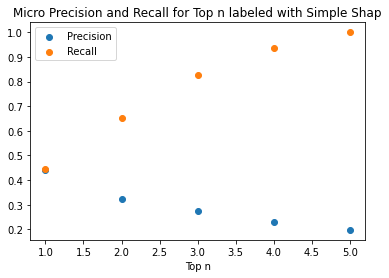

In [53]:
plt.scatter(np.arange(1,6), prec_vals, label='Precision')
plt.scatter(np.arange(1,6), rec_vals, label='Recall')
plt.legend()
plt.xlabel('Top n')
plt.title('Micro Precision and Recall for Top n labeled with Simple Shap')

In [13]:
post_process_flags(robo_array, shap_array)

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        ...,
        [1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 array([[ 0.16874212,  0.1382109 ,  0.1738901 ,  0.05635251,  0.18593534],
        [ 0.16825878,  0.12522594,  0.17546416,  0.09401524,  0.19147571],
        [ 0.15734226,  0.13278777,  0.16170654,  0.10130111,  0.17128954],
        ...,
        [-0.0223876 ,  0.01602946, -0.02239072, -0.02234536, -0.02230279],
        [-0.0369461 , -0.0369461 , -0.03694384,  0.02753638, -0.03596524],
        [-0.02930534, -0.02925463, -0.02930531,  0.07001121, -0.02870717]]))

In [19]:
shap_array=np.array(test_csv[test_csv.columns[4:11]])

In [20]:
robo_array=np.array(test_csv[test_csv.columns[20:]])

In [16]:
def threshold_occlusion(threshold, average_type='weighted'):
    #shap_array=np.array(test_csv[test_csv.columns[4:11]])
    #robo_array=np.array(test_csv[test_csv.columns[20:]])
    shap_array=np.array(test_csv[test_csv.columns[11:18]])
    robo_array=np.array(test_csv[test_csv.columns[27:]])
    robo, occlusion=post_process_flags(robo_array, shap_array)
    #print(occlusion)
    #print(len(occlusion))
    for index in range(len(occlusion)):
        tce=occlusion[index]
       # print(threshold)
        #print(occlusion[index])
        occlusion[index]=np.where(occlusion[index]<-1*threshold, 1, 0)
        
    #$print(occlusion)
    weighted_prec=precision_score(robo, occlusion, average=average_type, zero_division=0)
    weighted_rec=recall_score(robo,occlusion, average=average_type, zero_division=0)
    return weighted_prec, weighted_rec

In [17]:
prec_vals=[]
rec_vals=[]
for i in np.linspace(0, 1, 200):
    prec, rec=threshold_occlusion(i)
    prec_vals.append(prec)
    rec_vals.append(rec)

Text(0.5, 1.0, 'Weighted Precision and Recall vs. Threshold for Full Shap')

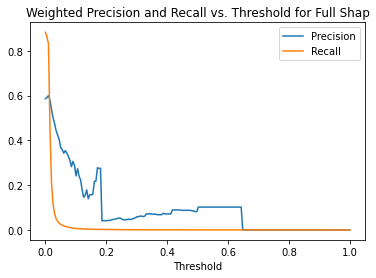

In [18]:
plt.plot(np.linspace(0, 1, 200), prec_vals, label='Precision')
plt.plot(np.linspace(0, 1, 200), rec_vals, label='Recall')
plt.legend()
#plt.ylim([0, 1])
plt.xlabel('Threshold')
plt.title('Weighted Precision and Recall vs. Threshold for Full Shap')

Text(0.5, 1.0, 'Weighted Precision and Recall vs. Threshold for Simple Shap')

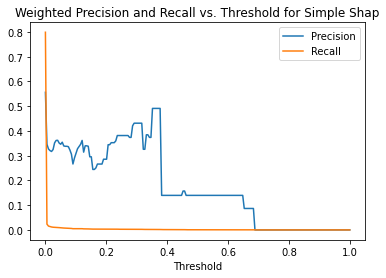

In [21]:
plt.plot(np.linspace(0, 1, 200), prec_vals, label='Precision')
plt.plot(np.linspace(0, 1, 200), rec_vals, label='Recall')
plt.legend()
#plt.ylim([0, 1])
plt.xlabel('Threshold')
plt.title('Weighted Precision and Recall vs. Threshold for Simple Shap')

In [22]:
np.save('/nobackup/khauskne/kdd/prec_thresh_simpleshap.npy',[np.linspace(0, 1, 200), prec_vals])
np.save('/nobackup/khauskne/kdd/rec_thresh_simpleshap.npy',[np.linspace(0, 1, 200), rec_vals])

Text(0.5, 1.0, 'Weighted Precision and Recall vs. Threshold for Simple Shap')

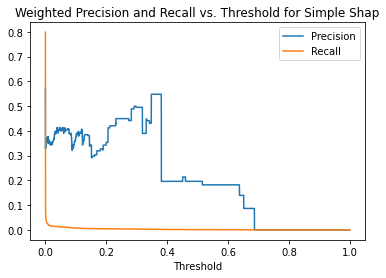

In [65]:
plt.plot(np.linspace(0, 1, 5000), prec_vals, label='Precision')
plt.plot(np.linspace(0, 1, 5000), rec_vals, label='Recall')
plt.legend()
#plt.ylim([0, 1])
plt.xlabel('Threshold')
plt.title('Weighted Precision and Recall vs. Threshold for Simple Shap')

In [66]:
prec_vals=[]
rec_vals=[]
for i in np.logspace(-10, 0, 5000):
    prec, rec=threshold_occlusion(i)
    prec_vals.append(prec)
    rec_vals.append(rec)

Text(0.5, 1.0, 'Weighted Precision and Recall vs. Threshold for Simple Shap')

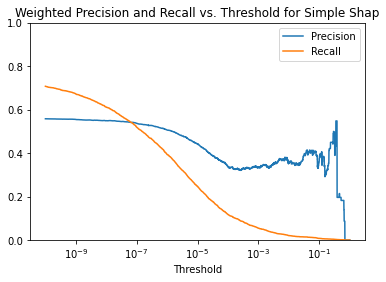

In [68]:
plt.plot(np.logspace(-10, 0, 5000), prec_vals, label='Precision')
plt.plot(np.logspace(-10, 0, 5000), rec_vals, label='Recall')
plt.legend()
plt.xscale('log')
plt.ylim([0, 1])
plt.xlabel('Threshold')
plt.title('Weighted Precision and Recall vs. Threshold for Simple Shap')

Issue of what if no branches are flagged by Robovetter? 
1) should we change/add a new metric to look only at cases where robovetter flags something
2) should we change the way we're doing this by introducing a threshold so that it can be completely analogous to the way we're doing our explainability?
3) should we add a new metric to analyze our explainability with where we only look at the maximally contributing branch in every case?

# Percentage of cases where there is at least one robovetter flag on that the maximally contributing branch (found via occlusion) agrees with one of the Robovetter flags

In [26]:
occlusion_array=np.array(test_csv[test_csv.columns[8:15]])
robo_array=np.array(test_csv[test_csv.columns[24:]])
num=0
denom=0
for index in range(len(occlusion_array)):
    tce=occlusion_array[index]
    max_contrib=np.argmax(tce)
    #print(max_contrib)
    robo_flags_on=np.where(robo_array[index]==1)[0]
    if (np.shape(robo_flags_on)[0]>0):
        denom=denom+1
        if (max_contrib in robo_flags_on):
            num=num+1
        elif (1 in robo_flags_on):
            if (max_contrib==0):
                num=num+1
print(num/denom)

0.5834677419354839


# Percentage of cases where there is at least one robovetter flag on that the top two maximally contributing branch (found via occlusion) agrees with one of the Robovetter flags

In [36]:
occlusion_array=np.array(test_csv[test_csv.columns[8:15]])
robo_array=np.array(test_csv[test_csv.columns[24:]])
num=0
denom=0
for index in range(len(occlusion_array)):
    tce=occlusion_array[index]
    max_contrib=np.argsort(tce)[-2:]
    robo_flags_on=np.where(robo_array[index]==1)[0]
    
    if (np.shape(robo_flags_on)[0]>0):
        denom=denom+1
        common_flags=np.intersect1d(robo_flags_on, max_contrib)
        if (np.shape(common_flags)[0]>0):
            num=num+1
        elif (1 in robo_flags_on):
            #print(robo_flags_on)
            if (0 in max_contrib):
               # print(max_contrib)
                num=num+1
print(num/denom)

0.8330645161290322


## Comparison of Occlusion and Our Methodology

In [70]:
def apply_statistics(branches, files, num_PCs):
    new_csv=files[0].copy()
    new_csv.pop('Unnamed: 0')
    for branch in branches:
        all_scores=np.zeros(tuple((num_PCs, np.shape(files[0])[0])))
        for example in range(len(files)):
            all_scores[example]=files[example][branch]
        col_index=new_csv.columns.get_loc(branch)
        new_csv[branch]=np.mean(all_scores, axis=0)
        new_csv.insert(col_index+1, branch+' Std', np.std(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Max', np.max(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Min', np.min(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Med', np.median(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Mean+Std', np.mean(all_scores, axis=0)+np.std(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Mean-Std', np.mean(all_scores, axis=0)-np.std(all_scores, axis=0))
    return new_csv



def evaluate_mean(csv, branches):
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    robo=np.array(csv[csv.columns[-7:]])
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]]<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'], 'minor_flags':csv['Minor_Descriptive_Flags'],'branch_explanations': branch_explanation, 'robo_flags': robo}
    return mean_dict

def evaluate_min(csv, branches):
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    robo=np.array(csv[csv.columns[-7:]])
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]+ ' Min']<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'],  'minor_flags':csv['Minor_Descriptive_Flags'], 'branch_explanations': branch_explanation, 'robo_flags': robo}
    return mean_dict

def evaluate_max(csv, branches):
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    robo=np.array(csv[csv.columns[-7:]])
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]+ ' Max']<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'],  'minor_flags':csv['Minor_Descriptive_Flags'], 'branch_explanations': branch_explanation, 'robo_flags': robo}
    return mean_dict

def evaluate_med(csv, branches):
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    robo=np.array(csv[csv.columns[-7:]])
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]+ ' Med']<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'],  'minor_flags':csv['Minor_Descriptive_Flags'], 'branch_explanations': branch_explanation, 'robo_flags': robo}
    return mean_dict


In [85]:
def get_csv_with_stat(num_PCs, trial):
    run='/nobackup/khauskne/kdd/explainability_runs/exp_'+str(num_PCs)+'_PCs_trial_'+str(trial)+'/'
    all_train_groups=[]
    for index in range(num_PCs):
        train_group=pd.read_csv(run+'train_top_'+str(index)+'.csv')
        all_train_groups.append(train_group)
    

    all_val_groups=[]
    for index in range(num_PCs):
        val_group=pd.read_csv(run+'val_top_'+str(index)+'.csv')
        all_val_groups.append(val_group)

    all_test_groups=[]
    for index in range(num_PCs):
        test_group=pd.read_csv(run+'test_top_'+str(index)+'.csv')
        all_test_groups.append(test_group)

    branches=['Global Flux', 'Local Flux', 'Centroid', 'Odd Even', 'Secondary', 'Stellar', 'DV']
    train_statistics=apply_statistics(branches, all_train_groups, num_PCs)
    val_statistics=apply_statistics(branches, all_val_groups, num_PCs)
    test_statistics=apply_statistics(branches, all_test_groups, num_PCs)
    return train_statistics[['Global Flux Min', 'Local Flux Min', 'Centroid Min', 'Odd Even Min',
                                         'Secondary Min', 'Stellar Min', 'DV Min']], val_statistics[['Global Flux Min', 'Local Flux Min', 'Centroid Min', 'Odd Even Min',
                                         'Secondary Min', 'Stellar Min', 'DV Min']], test_statistics[['Global Flux Min', 'Local Flux Min', 'Centroid Min', 'Odd Even Min',
                                         'Secondary Min', 'Stellar Min', 'DV Min']]

In [159]:
num_PCs=np.shape(np.where(test_csv['original_label']=='PC')[0])[0]
total_test=np.shape(test_csv)[0]
threshold_vals=np.logspace(-9, 0, 1000)

In [160]:
num_flagged=[]
for i in threshold_vals:
    threshold_flagged=np.shape(np.unique(np.where(test_csv[test_csv.columns[8:15]]>i)[0]))[0]
    num_flagged.append(threshold_flagged)
num_flagged=np.array(num_flagged)

In [161]:
test_new_exp=get_csv_with_stat(15, 2)[2]

In [162]:
num_flagged_new_exp=[]
for i in threshold_vals:
    threshold_flagged=np.shape(np.unique(np.where(test_new_exp<-1*i)[0]))[0]
    num_flagged_new_exp.append(threshold_flagged)
num_flagged_new_exp=np.array(num_flagged_new_exp)

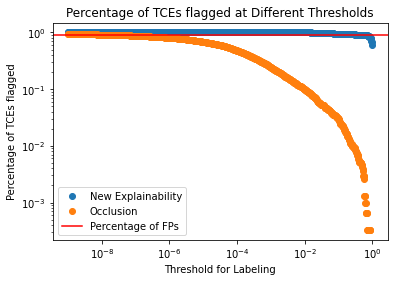

In [168]:
plt.title('Percentage of TCEs flagged at Different Thresholds')
plt.xlabel('Threshold for Labeling')
plt.ylabel('Percentage of TCEs flagged')



plt.loglog(threshold_vals, num_flagged_new_exp/total_test, 'o', label='New Explainability')
plt.loglog(threshold_vals, num_flagged/total_test, 'o', label='Occlusion')
plt.axhline(1-(num_PCs/total_test), color='r', label='Percentage of FPs')
plt.legend()
#plt.scatter(threshold_vals, num_flagged_new_exp/total_test)
#plt.scatter(threshold_vals, num_flagged/total_test)


In [169]:
num_PCs=np.shape(np.where(test_csv['original_label']=='PC')[0])[0]
total_test=np.shape(test_csv)[0]
threshold_vals=np.linspace(0, 1, 10000)

In [170]:
num_flagged=[]
for i in threshold_vals:
    threshold_flagged=np.shape(np.unique(np.where(test_csv[test_csv.columns[8:15]]>i)[0]))[0]
    num_flagged.append(threshold_flagged)
num_flagged=np.array(num_flagged)

In [171]:
test_new_exp=get_csv_with_stat(10, 2)[2]

In [172]:
num_flagged_new_exp=[]
for i in threshold_vals:
    threshold_flagged=np.shape(np.unique(np.where(test_new_exp<-1*i)[0]))[0]
    num_flagged_new_exp.append(threshold_flagged)
num_flagged_new_exp=np.array(num_flagged_new_exp)

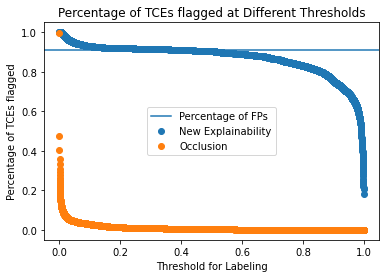

In [174]:
plt.title('Percentage of TCEs flagged at Different Thresholds')
plt.xlabel('Threshold for Labeling')
plt.ylabel('Percentage of TCEs flagged')

#plt.loglog(threshold_vals, num_flagged_new_exp/total_test, 'o')
#plt.loglog(threshold_vals, num_flagged/total_test, 'o')

plt.scatter(threshold_vals, num_flagged_new_exp/total_test, label='New Explainability')
plt.scatter(threshold_vals, num_flagged/total_test, label='Occlusion')
plt.axhline(1-(num_PCs/total_test), label='Percentage of FPs')
plt.legend()